# TRAINING THE DATASET

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
datframe = pd.read_csv('column_2C_weka.csv')
#datframe.head()

In [3]:
#datframe.head()
datframe=datframe[['pelvic_incidence','pelvic_radius','lumbar_lordosis_angle','class']]
datframe.columns=['Humidity','Tempreature','Vibration','class']
datframe.head()

,Humidity,Tempreature,Vibration,class
0,63.027818,98.672917,39.609117,Abnormal
1,39.056951,114.405425,25.015378,Abnormal
2,68.832021,105.985135,50.092194,Abnormal
3,69.297008,101.868495,44.311238,Abnormal
4,49.712859,108.168725,28.317406,Abnormal


In [4]:
datframe['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [5]:
cleanup_names = {'class':{'Abnormal':0,'Normal':1}}

In [6]:
datframe.replace(cleanup_names, inplace=True)

In [7]:

datframe.head()

,Humidity,Tempreature,Vibration,class
0,63.027818,98.672917,39.609117,0
1,39.056951,114.405425,25.015378,0
2,68.832021,105.985135,50.092194,0
3,69.297008,101.868495,44.311238,0
4,49.712859,108.168725,28.317406,0


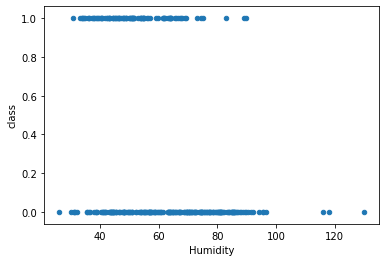

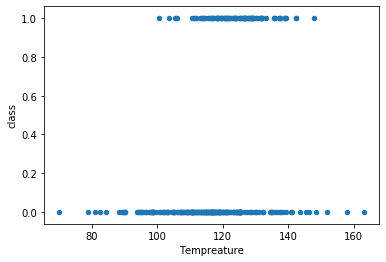

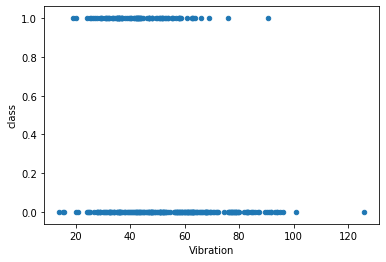

In [8]:
for i in datframe.columns[:-1]:
    ax1 = datframe.plot.scatter(x=i, y="class")

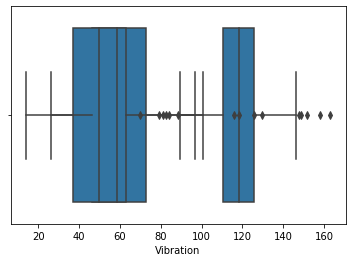

In [9]:
import seaborn as sns
for i in datframe.columns[:-1]:
    sns.boxplot(x=datframe[i])

In [11]:
import numpy as np
labs=datframe['class']
labs=np.asarray(labs)
labs = np.reshape(labs,(-1,1))

# USING MEAN SHIFT ALGORITHM for all the types of SENSORS

In [12]:
#Making imports
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt


#CLUSTERING FUNCTION: default threshold value is 15
def cluster(cols,test=None,threshold=15):
    
    train_data = np.array(datframe[cols])
    #print(max(train_data),min(train_data))
    X_train = np.reshape(train_data,(-1,1))
    ms = MeanShift(bandwidth=None, bin_seeding=True)
    ms.fit(X_train)
    labels = ms.labels_
    gg=[X_train,labs]
    gg=np.asarray(gg)
    cluster_centers = ms.cluster_centers_
    
    #print(cluster_centers)

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    print("number of estimated clusters : %d" % n_clusters_)
    print(labels)

    plt.figure(1)
    plt.clf()
    X=gg
    colors = ['b','g','r','c','m','y']
    for i in range(len(X_train)):
        p=labels[i]
        #print(X_train[i][0],labs[i][0])
        color=colors[p]
        plt.scatter(X_train[i],labs[i],color=color)
    if test:
        d=np.asarray(test)
        dt=d.transpose()
        points=dt[0]
        bs=dt[1]
        plt.scatter(points,bs,marker='*')
        
        print('\n The Nearest Clusters for the following points are')
        
        outs=ms.predict(points.reshape(-1,1))
        print(outs)
        print('\n\n\n')
        cents=[]
        for i in outs:
            cents.append(int(list(cluster_centers)[i]))
        cents=np.asarray(cents)
        
        #Checking if the differece is greater than the threshold
        ans=points-cents
        #print(ans)
        rejected,passed=[],[]
        for i in range(len(ans)):
            if abs(ans[i])>threshold:
                rejected.append(test[i])
            else:
                passed.append(test[i])
        return (rejected,passed)
        
            
    #plt.scatter(train_data,labs)  
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()



# CLUSTERING RESULTS FOR ALL 3 SENSORS

Humidity
number of estimated clusters : 4
[1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 2 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 3 1 1 1 1 0 1 1 1 1 0 1 1 2 1 0 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 2 1 2 2 0 1 1 1 2 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 1 2 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0]


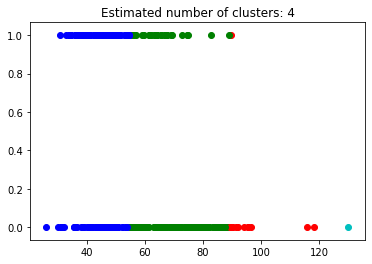





Tempreature
number of estimated clusters : 3
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 2 2 0 0 0 2 0 0 1 2 0 0 0
 0 2 0 0 0 2 0 1 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


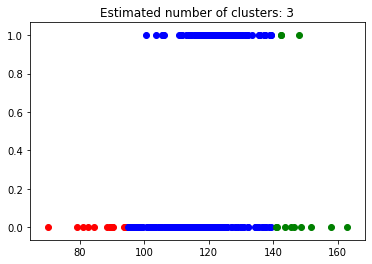





Vibration
number of estimated clusters : 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


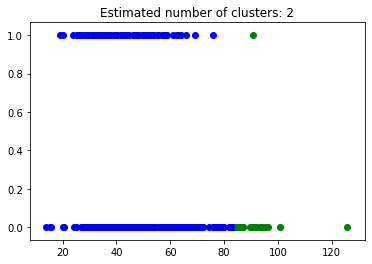

In [13]:
for i in datframe.columns[:-1]:
    print(i)
    
    cluster(i)
    print('\n\n\n')

# RANDOM TEST DATA GENERATOR

In [14]:
import random

def generate():
    s=[0,1]
    test=[]
    for i in range(20):
        g=random.random()*100
        random.shuffle(s)
        test.append([g,s[0]])
    return test
    

# EXAMPLES

number of estimated clusters : 3
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 2 2 0 0 0 2 0 0 1 2 0 0 0
 0 2 0 0 0 2 0 1 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0]

 The Nearest Clusters for the following points are
[2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2]




The Rejected list is:  [[90.26200141627938, 1], [5.974546820057036, 1], [18.539472823091263, 0], [9.955828204349192, 0], [47.05972333998735, 0], [97.10186138824842, 1], [87.69205474236766, 1], [34.4969911951578, 1], [42.13544099112438, 0],

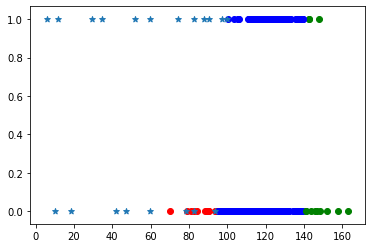

In [15]:
answer=cluster('Tempreature',generate())
print('The Rejected list is: ',answer[0],'\n')
print('The Passed list is: ',answer[1],'\n')

number of estimated clusters : 4
[1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 2 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 3 1 1 1 1 0 1 1 1 1 0 1 1 2 1 0 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 2 1 2 2 0 1 1 1 2 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 1 2 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0]

 The Nearest Clusters for the following points are
[1 0 0 0 0 0 2 0 0 1 1 1 1 1 0 2 1 0 0 0]




The Rejected list is:  [[78.41836511354171, 1], [15.690649177090531, 1], [10.552077391559067, 1], [21.992116856841616, 0], [26.83667429546569, 0], [4.354466835096904, 1], [96.92996212365566, 0], [1.3486669158345732, 1], [85.38363870536165,

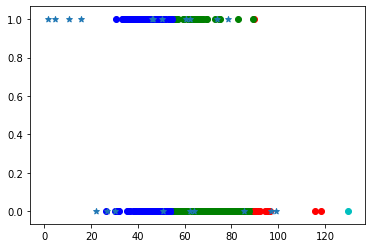

In [16]:
answer=cluster('Humidity',generate())
print('The Rejected list is: ',answer[0],'\n')
print('The Passed list is: ',answer[1],'\n')